In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\programdata\anaconda3\lib\site-packages (3.8.1)



In [1]:
import pandas as pd
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Schroedinger\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv('C:/Users/Schroedinger/Documents/BA jobsim/BA_cleaned_reviews.csv')
df

,verification_status,cleaned_reviews
0,Trip Verified,the seats were excellent with a feel of much m...
1,Trip Verified,after the nightmare of getting through triple ...
2,Trip Verified,prior to boarding a gate agent seemed to pick ...
3,Trip Verified,i flew from amsterdam to las vegas with a layo...
4,Trip Verified,first the good news the club suites are such a...
...,...,...
995,Trip Verified,sydney to london via singapore with british ai...
996,Not Verified,london to johannesburg british airways is one ...
997,Trip Verified,i have to say travelling in club europe is a w...
998,Not Verified,i had a stress free journey with my 8 yr old a...


In [7]:
df.index.name = 'sn'
df.index = df.index + 1
df.head()

,verification_status,cleaned_reviews
sn,,
1,Trip Verified,the seats were excellent with a feel of much m...
2,Trip Verified,after the nightmare of getting through triple ...
3,Trip Verified,prior to boarding a gate agent seemed to pick ...
4,Trip Verified,i flew from amsterdam to las vegas with a layo...
5,Trip Verified,first the good news the club suites are such a...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
df.columns

Index(['verification_status', 'cleaned_reviews'], dtype='object')

In [17]:
df['serial_no'] = range(1, len(df) + 1)

In [21]:
df.head()

,verification_status,cleaned_reviews,serial_no
sn,,,
1,Trip Verified,the seats were excellent with a feel of much m...,1
2,Trip Verified,after the nightmare of getting through triple ...,2
3,Trip Verified,prior to boarding a gate agent seemed to pick ...,3
4,Trip Verified,i flew from amsterdam to las vegas with a layo...,4
5,Trip Verified,first the good news the club suites are such a...,5


In [25]:
cols = df.columns.tolist()
cols.pop(2)
cols.insert(0, 'serial_no')
df = df[cols]
df.head()

,serial_no,verification_status,cleaned_reviews
sn,,,
1,1,Trip Verified,the seats were excellent with a feel of much m...
2,2,Trip Verified,after the nightmare of getting through triple ...
3,3,Trip Verified,prior to boarding a gate agent seemed to pick ...
4,4,Trip Verified,i flew from amsterdam to las vegas with a layo...
5,5,Trip Verified,first the good news the club suites are such a...


In [29]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_reviews']
    sn = row['serial_no']
    result[sn] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [33]:
vadres = pd.DataFrame(result).T
vadres = vadres.reset_index().rename(columns={'index':'serial_no'})
vadres = vadres.merge(df, how='left')

In [35]:
vadres

,serial_no,neg,neu,pos,compound,verification_status,cleaned_reviews
0,1,0.030,0.878,0.092,0.6682,Trip Verified,the seats were excellent with a feel of much m...
1,2,0.070,0.751,0.179,0.9428,Trip Verified,after the nightmare of getting through triple ...
2,3,0.082,0.885,0.033,-0.9026,Trip Verified,prior to boarding a gate agent seemed to pick ...
3,4,0.049,0.927,0.024,-0.8095,Trip Verified,i flew from amsterdam to las vegas with a layo...
4,5,0.046,0.786,0.168,0.9437,Trip Verified,first the good news the club suites are such a...
...,...,...,...,...,...,...,...
995,996,0.045,0.856,0.099,0.9046,Trip Verified,sydney to london via singapore with british ai...
996,997,0.085,0.797,0.118,0.9443,Not Verified,london to johannesburg british airways is one ...
997,998,0.125,0.813,0.062,-0.7357,Trip Verified,i have to say travelling in club europe is a w...
998,999,0.035,0.783,0.182,0.9824,Not Verified,i had a stress free journey with my 8 yr old a...


In [37]:
def get_sentiment(row):
    if row['compound'] >= 0.05:
        return 'positive'
    elif row['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


vadres['sen_label'] = vadres.apply(get_sentiment, axis=1)

vadres.head()

,serial_no,neg,neu,pos,compound,verification_status,cleaned_reviews,sen_label
0,1,0.030,0.878,0.092,0.6682,Trip Verified,the seats were excellent with a feel of much m...,positive
1,2,0.070,0.751,0.179,0.9428,Trip Verified,after the nightmare of getting through triple ...,positive
2,3,0.082,0.885,0.033,-0.9026,Trip Verified,prior to boarding a gate agent seemed to pick ...,negative
3,4,0.049,0.927,0.024,-0.8095,Trip Verified,i flew from amsterdam to las vegas with a layo...,negative
4,5,0.046,0.786,0.168,0.9437,Trip Verified,first the good news the club suites are such a...,positive


In [43]:
sentiment_distribution = vadres.groupby(['verification_status', 'sen_label']).size().unstack(fill_value=0)

print(sentiment_distribution)

sen_label            negative  neutral  positive
verification_status                             
Not Verified              143        0       116
Trip Verified             376       19       346


In [47]:
sentiment_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100
print(sentiment_percentage)

sen_label             negative   neutral   positive
verification_status                                
Not Verified         55.212355  0.000000  44.787645
Trip Verified        50.742240  2.564103  46.693657


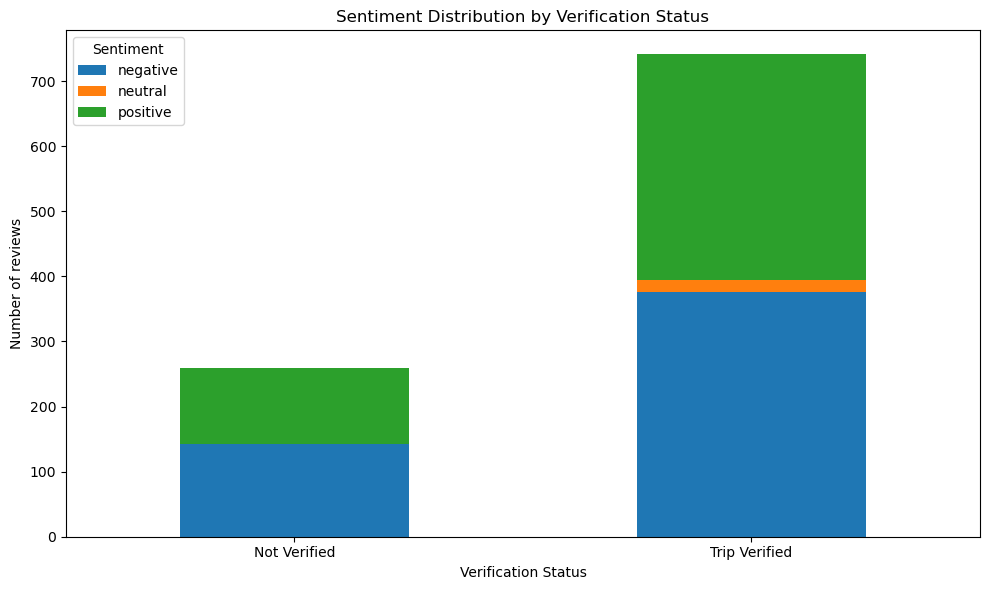

In [69]:
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Sentiment Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{output_dir}/Stacked Sentiment Chart")

plt.show()

In [59]:
ver_data = vadres[vadres['verification_status'] == 'Trip Verified']
unver_data = vadres[vadres['verification_status'] == 'Not Verified']

#aggregate sentiment counts for verified and unverified trips
ver_counts = ver_data['sen_label'].value_counts()
unver_counts = unver_data['sen_label'].value_counts()

print("Verified counts:\n", ver_counts)
print("Unverified counts\n", unver_counts)

Verified counts:
 sen_label
negative    376
positive    346
neutral      19
Name: count, dtype: int64
Unverified counts
 sen_label
negative    143
positive    116
Name: count, dtype: int64


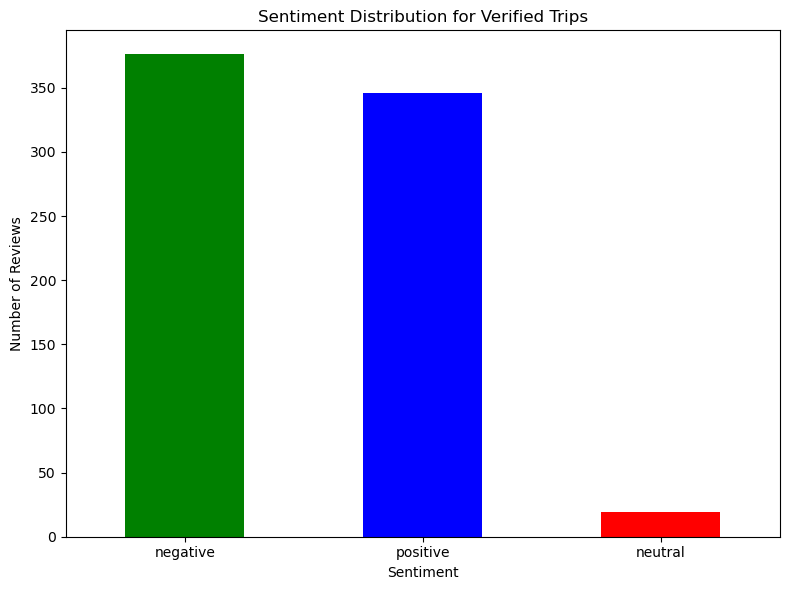

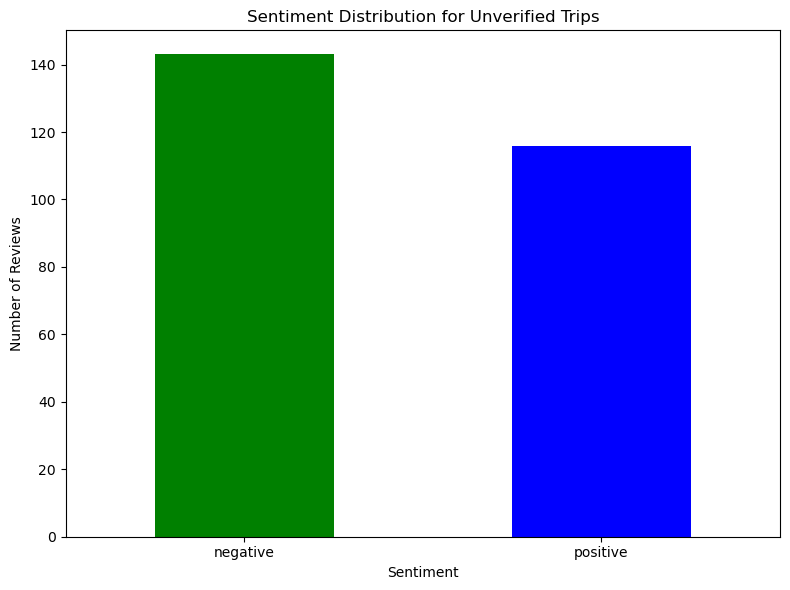

In [73]:
#Bar plot for verified trips
plt.figure(figsize=(8,6))
ver_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for Verified Trips')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{output_dir}/Veriifed Trips")
plt.show()

#Bar plot for unverified trips
plt.figure(figsize=(8,6))
unver_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for Unverified Trips')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{output_dir}/Unverified Trips")
plt.show()

In [63]:
import os
output_dir = "sentiment charts"
os.makedirs(output_dir, exist_ok=True)



In [ ]:
plt.savefig(f"{output_dir}/{plt.title}")